# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

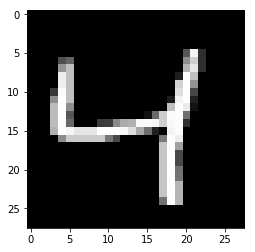

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [13]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
input_dim=784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, input_dim])
targets_ = tf.placeholder(tf.float32, [None, input_dim])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, input_dim, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt  = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)


## Training

In [14]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [15]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6900
Epoch: 1/20... Training loss: 0.6866
Epoch: 1/20... Training loss: 0.6825
Epoch: 1/20... Training loss: 0.6776
Epoch: 1/20... Training loss: 0.6718
Epoch: 1/20... Training loss: 0.6638
Epoch: 1/20... Training loss: 0.6559
Epoch: 1/20... Training loss: 0.6455
Epoch: 1/20... Training loss: 0.6341
Epoch: 1/20... Training loss: 0.6209
Epoch: 1/20... Training loss: 0.6073
Epoch: 1/20... Training loss: 0.5910
Epoch: 1/20... Training loss: 0.5764
Epoch: 1/20... Training loss: 0.5611
Epoch: 1/20... Training loss: 0.5429
Epoch: 1/20... Training loss: 0.5247
Epoch: 1/20... Training loss: 0.5086
Epoch: 1/20... Training loss: 0.4928
Epoch: 1/20... Training loss: 0.4706
Epoch: 1/20... Training loss: 0.4530
Epoch: 1/20... Training loss: 0.4337
Epoch: 1/20... Training loss: 0.4265
Epoch: 1/20... Training loss: 0.4088
Epoch: 1/20... Training loss: 0.3903
Epoch: 1/20... Training loss: 0.3864
Epoch: 1/20... Training loss: 0.3715
E

Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1990
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.2025
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1983
Epoch: 1/20... Training loss: 0.2045
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.2000
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.2015
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1910
E

Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1615
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1641
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1629
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1605
E

Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1434
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1436
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1425
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1391
E

Epoch: 3/20... Training loss: 0.1194
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1272
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1245
Epoch: 3/20... Training loss: 0.1262
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1251
Epoch: 3/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1248
E

Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1151
E

Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1099
E

Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1118
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1073
E

Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1048
E

Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1030
E

Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0957
E

Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0918
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0967
E

Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0888
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0986
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

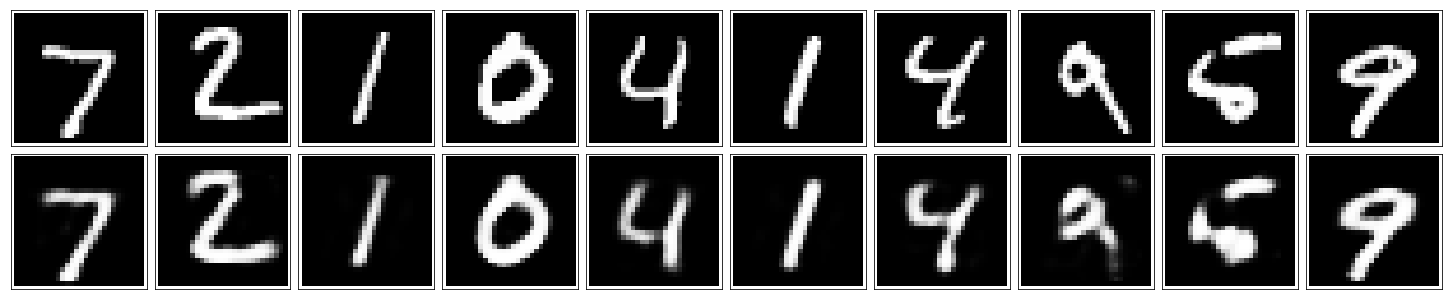

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.